In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
from scipy import stats
from scipy.stats import zscore
from math import radians, cos, sin, asin, sqrt
import pydot_ng as pydot
import keras
from keras import metrics
from keras import regularizers
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.optimizers import Adam, RMSprop
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
from keras.utils import plot_model

import tensorflow as tf

In [2]:
depev = pd.read_csv('depev_final.csv')
depev.drop(depev.columns[depev.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
depev.head()

,URBRRL,RATCAT_A,INCGRP_A,INCTCFLG_A,FAMINCTC_A,IMPINCFLG_A,PPSU,PSTRAT,HISPALLP_A,RACEALLP_A,...,ANGEV_A,CHDEV_A,CHLEV_A,HYPEV_A,PHSTAT_A,AVAIL_A,INTV_QRT,WTFA_A,WTIA_A,POVRATTC_A
0,4,9,3,0,60000,2,2,122,3,2,...,2,2,1,2,3,1,1,13177.008,7601.336,2.96
1,4,9,3,0,50000,0,2,122,2,1,...,2,2,2,2,1,1,1,6140.552,3344.434,2.97
2,4,12,3,0,65000,1,2,122,2,1,...,2,2,1,1,3,1,1,9191.061,6949.498,4.28
3,4,14,5,0,120000,0,2,122,1,8,...,2,2,2,1,2,1,1,7900.035,6446.327,7.13
4,1,4,1,0,30000,0,2,115,2,1,...,1,1,1,1,4,1,1,10875.772,8646.586,1.13


In [3]:
phq = depev[['PHQ88_A', 'PHQ87_A', 'PHQ86_A', 'PHQ85_A', 'PHQ84_A', 'PHQ83_A', 'PHQ82_A', 'PHQ81_A', 'DEPEV_A']]
phq.head()

,PHQ88_A,PHQ87_A,PHQ86_A,PHQ85_A,PHQ84_A,PHQ83_A,PHQ82_A,PHQ81_A,DEPEV_A
0,1,1,1,1,1,1,1,1,2
1,1,2,1,1,1,1,1,1,2
2,1,1,1,1,1,2,1,1,2
3,1,1,1,1,1,2,1,1,2
4,1,4,2,2,3,2,3,4,1


In [4]:
phq.to_csv('phq.csv')

URBRRL = 2013 NCHS Urban-Rural Classification Scheme for Counties \
RATCAT = Ratio of family income to poverty threshold for SA's family \
INCGRP = Sample adult family income (grouped) \
FAMINCTC = Sample adult family income (top-coded) \
RACEALLP = Single and multiple race groups \
BMICAT = Categorical body mass index, public use \
WEIGHTLBTC = Weight without shoes (pounds), public use \
HEIGHTTC = Total height in inches, public use \
PCNTTC = Top-coded count of all non-deleted household members \
NOTCOV = Coverage status as used in Health United States \
EDUC = Educational level of sample adult \
PCNTFAM = Number of persons in Sample Adult family, top-coded 6+ \
HISP = Recode: Hispanic ethnicity of SA \
REGION = Household region \
SEX = Sex of Sample Adult \
AGEP = Age of SA (top coded) \
HOUTENURE = Residence owned/rented \
INCINTER = Income from accounts \
INCWRKO = Income from wages \
SCHCURENR = Currently in school \
NATUSBORN = Born in U.S. or U.S. territory \
AFVET = Ever serve active duty military \
MARITAL = Sample adult's current marital status \
SMKEV = Ever smoked 100 cigarettes \
LASTDR = Time since last saw doctor \
PAYBLL12M = Problems paying medical bills, past 12m \
DIBEV = Ever had diabetes \
PREDIB = Ever had prediabetes \
CANEV = Ever been told you had cancer \
ASEV = Ever had asthma \
POVRATTC = SA family poverty ratio (top-coded)

In [5]:
key_char = depev[['URBRRL', 'RATCAT_A', 'INCGRP_A', 'FAMINCTC_A', 'RACEALLP_A', 'BMICAT_A', \
                        'WEIGHTLBTC_A', 'HEIGHTTC_A', 'PCNTTC', 'NOTCOV_A', 'EDUC_A', 'PCNTFAM_A', \
                        'HISP_A', 'REGION', 'SEX_A', 'AGEP_A', 'HOUTENURE_A', \
                        'INCWRKO_A', 'SCHCURENR_A', 'NATUSBORN_A', \
                        'AFVET_A', 'MARITAL_A', 'SMKEV_A', 'LASTDR_A', 'PAYBLL12M_A', \
                        'DIBEV_A', 'PREDIB_A', 'CANEV_A', 'ASEV_A', 'POVRATTC_A', 'DEPEV_A']]
key_char.head()

,URBRRL,RATCAT_A,INCGRP_A,FAMINCTC_A,RACEALLP_A,BMICAT_A,WEIGHTLBTC_A,HEIGHTTC_A,PCNTTC,NOTCOV_A,...,MARITAL_A,SMKEV_A,LASTDR_A,PAYBLL12M_A,DIBEV_A,PREDIB_A,CANEV_A,ASEV_A,POVRATTC_A,DEPEV_A
0,4,9,3,60000,2,3,201,71,3,2,...,1,2,1,2,2,2,2,2,2.96,2
1,4,9,3,50000,1,2,130,62,2,2,...,1,1,1,2,2,2,2,2,2.97,2
2,4,12,3,65000,1,3,215,74,2,2,...,1,2,1,2,2,1,1,2,4.28,2
3,4,14,5,120000,8,4,290,72,2,2,...,1,2,1,2,2,2,2,2,7.13,2
4,1,4,1,30000,1,4,290,72,4,2,...,1,1,1,1,1,1,2,1,1.13,1


In [6]:
key_char.to_csv("key_characteristics.csv")

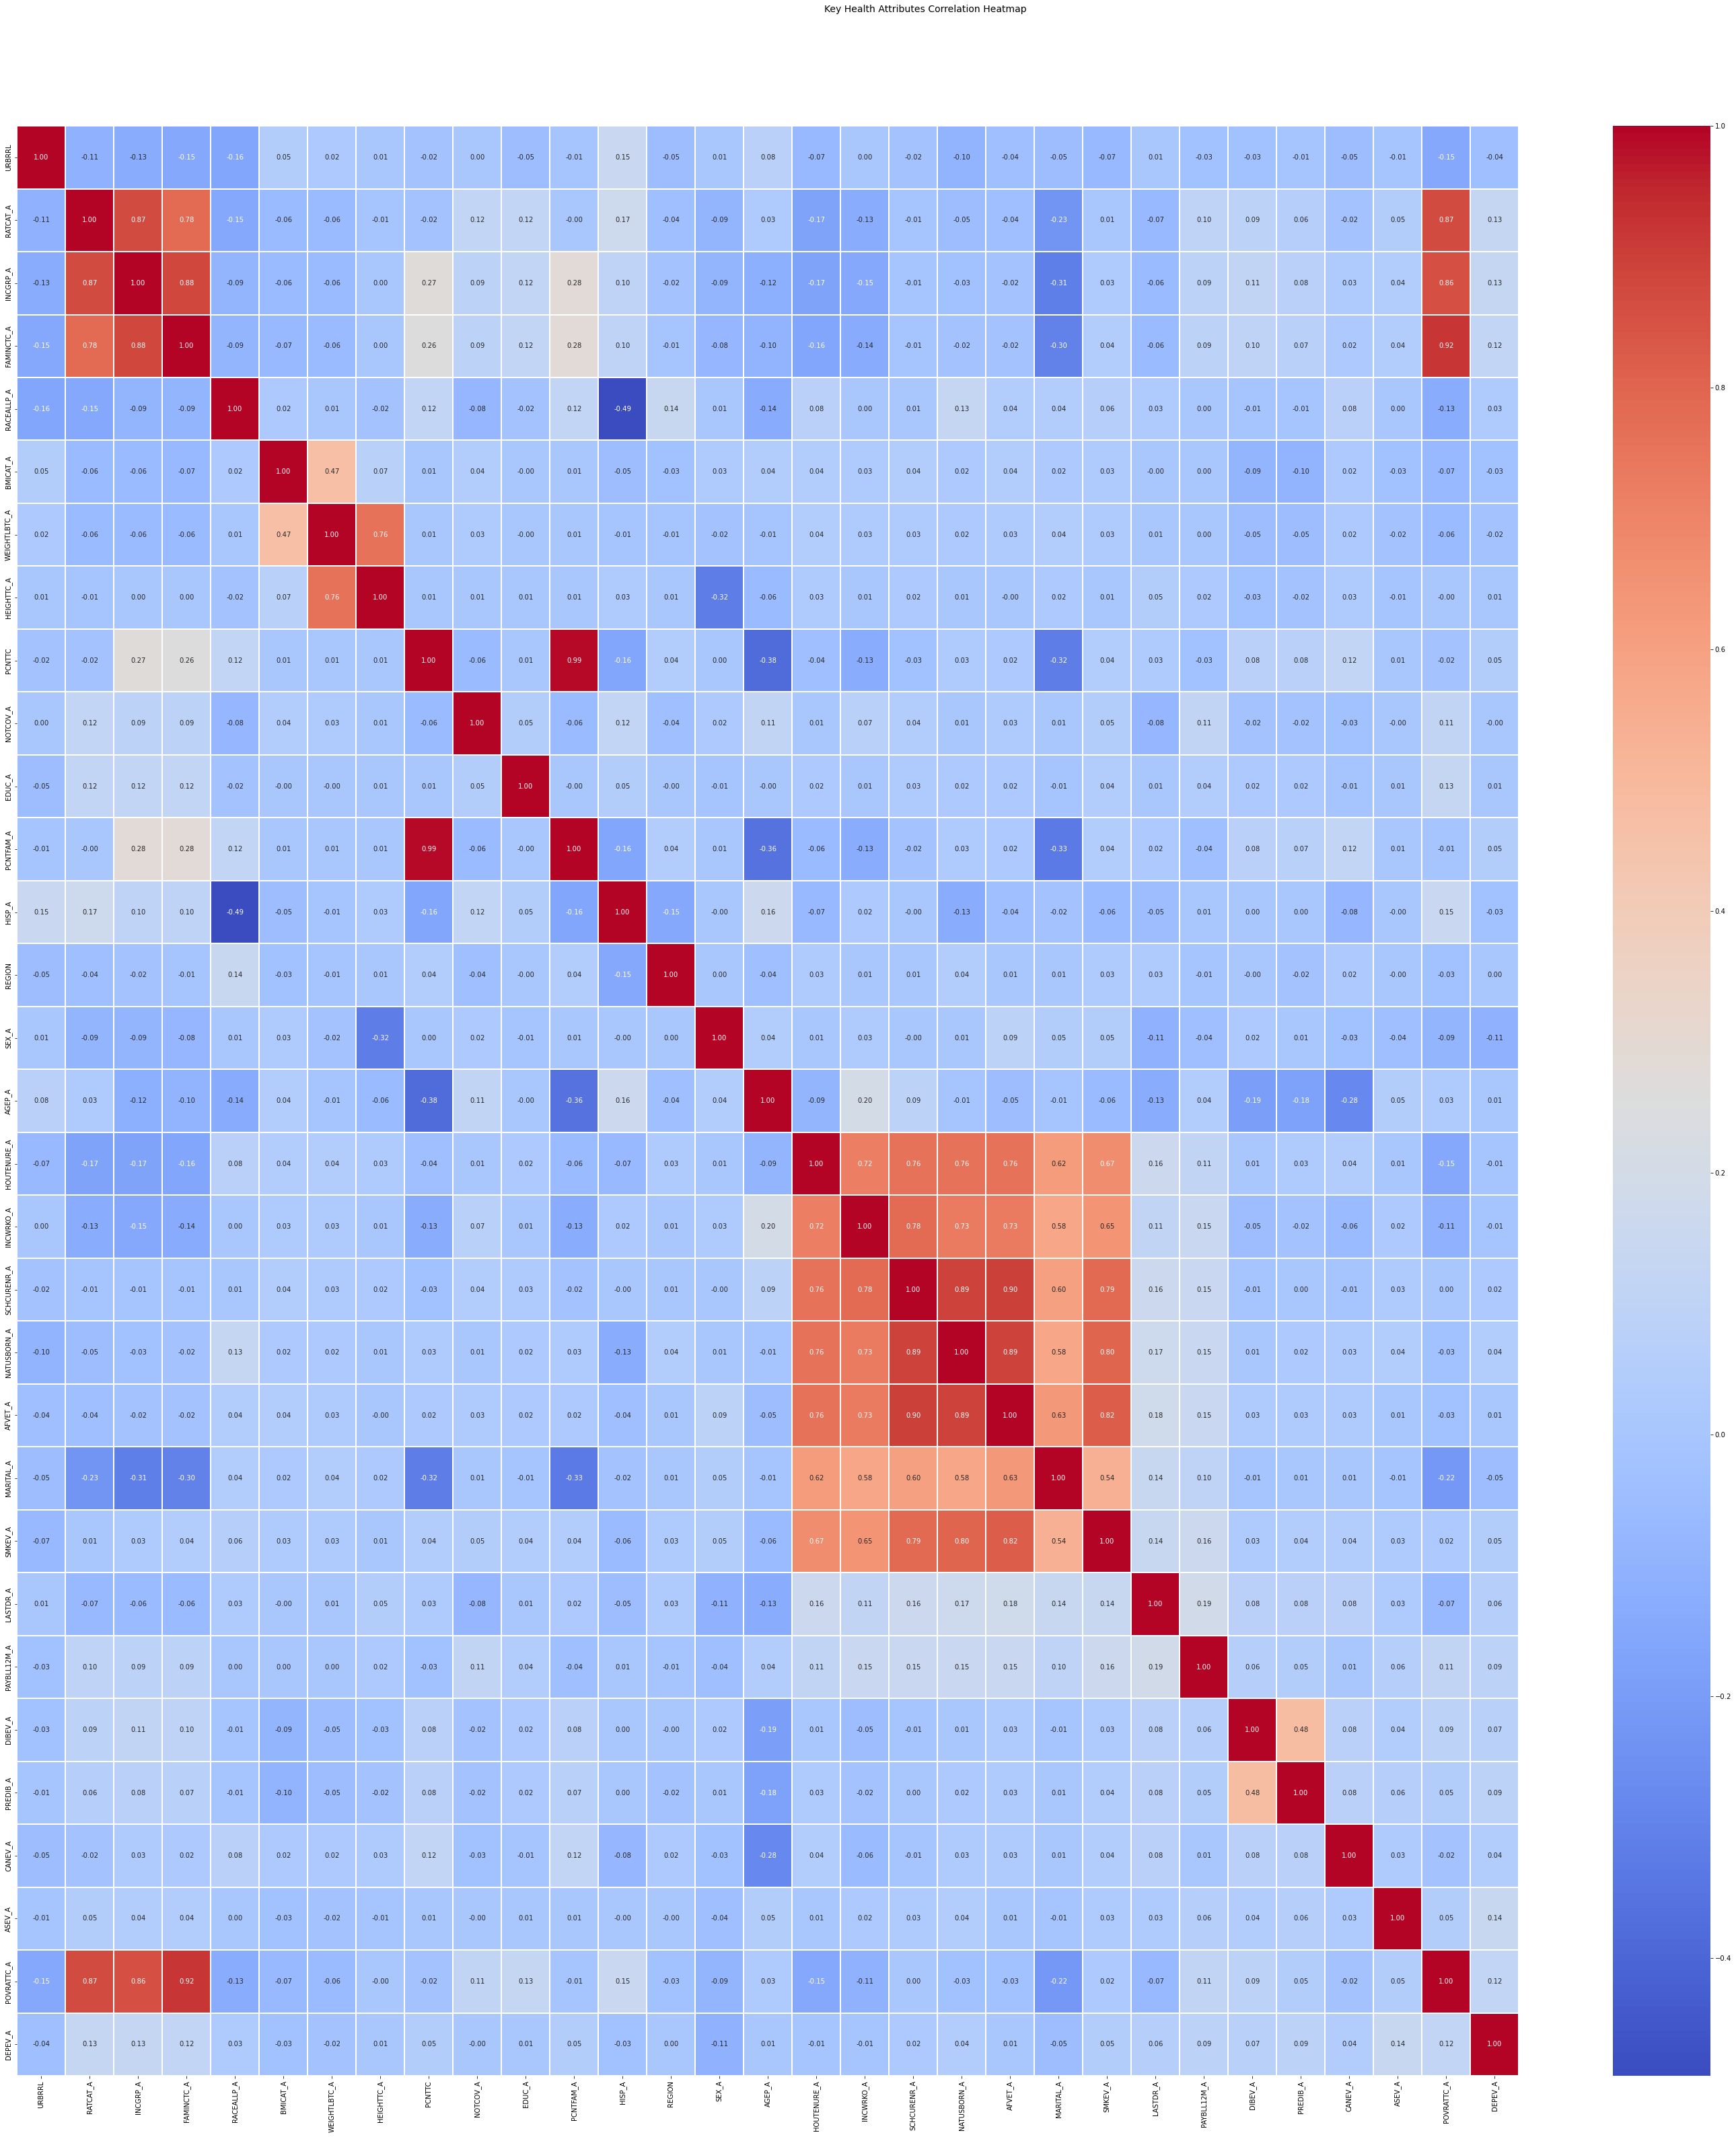

In [7]:
f, ax = plt.subplots(figsize=(50, 50))
corr = key_char.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t = f.suptitle('Key Health Attributes Correlation Heatmap', fontsize=14)

In [8]:
depev_corr = corr['DEPEV_A']
depev_corr.head()

URBRRL       -0.036662
RATCAT_A      0.130135
INCGRP_A      0.125204
FAMINCTC_A    0.117285
RACEALLP_A    0.030150
Name: DEPEV_A, dtype: float64

Highest correlations: \
ASEV = ever had asthma \
RATCAT = ratio of family income to poverty level \
INCGRP = family income \
FAMINCTC = family income \
POVRATTC = family poverty ratio \
SEX = sex

Lowest correlations: \
NOTCOV = health coverage \
REGION = household region \
AGEP = age \
INCWRKO = income from job \
HEIGHTTC = height \
AFVET = ever serve in military

In [9]:
depev_corr.abs().sort_values(ascending=False)

DEPEV_A         1.000000
ASEV_A          0.135835
RATCAT_A        0.130135
INCGRP_A        0.125204
FAMINCTC_A      0.117285
POVRATTC_A      0.117064
SEX_A           0.106414
PREDIB_A        0.093533
PAYBLL12M_A     0.092191
DIBEV_A         0.073691
LASTDR_A        0.060659
MARITAL_A       0.054158
SMKEV_A         0.053971
PCNTFAM_A       0.050464
PCNTTC          0.049113
NATUSBORN_A     0.039469
CANEV_A         0.038936
URBRRL          0.036662
BMICAT_A        0.030341
RACEALLP_A      0.030150
HISP_A          0.029593
WEIGHTLBTC_A    0.024751
SCHCURENR_A     0.016113
EDUC_A          0.014191
HOUTENURE_A     0.013390
AFVET_A         0.012791
HEIGHTTC_A      0.009921
INCWRKO_A       0.007839
AGEP_A          0.005370
REGION          0.003634
NOTCOV_A        0.000421
Name: DEPEV_A, dtype: float64